In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import os
print("Current dir",os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir,"datasets","Train")
test_path = os.path.join(curr_dir,"datasets","Test")
valid_path = os.path.join(curr_dir,"datasets","valid")

Current dir c:\Users\HP\OneDrive\Documents\Desktop\Coding\Machine-Learning\Projects\Potato Disease Detection


In [3]:
print(f"train path : {train_path} \n test path : {test_path} \n valid path : {valid_path}")

train path : c:\Users\HP\OneDrive\Documents\Desktop\Coding\Machine-Learning\Projects\Potato Disease Detection\datasets\Train 
 test path : c:\Users\HP\OneDrive\Documents\Desktop\Coding\Machine-Learning\Projects\Potato Disease Detection\datasets\Test 
 valid path : c:\Users\HP\OneDrive\Documents\Desktop\Coding\Machine-Learning\Projects\Potato Disease Detection\datasets\valid


In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels = "inferred",
    label_mode = "categorical",
    color_mode = "rgb",
    image_size = (128,128),
    shuffle = True,
    interpolation = "bilinear"
)

Found 900 files belonging to 3 classes.


In [5]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
training_set.sample_from_datasets

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.sample_from_datasets(datasets, weights=None, seed=None, stop_on_empty_dataset=False, rerandomize_each_iteration=None) -> 'DatasetV2'>

In [83]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels = "inferred",
    label_mode = "categorical",
    color_mode = "rgb",
    image_size = (128,128),
    shuffle = True,
    interpolation = "bilinear"
)

Found 300 files belonging to 3 classes.


In [ ]:
for image_batch , label_batch in training_set:
    print(image_batch)
    print(label_batch)

In [ ]:
for image_batch , label_batch in training_set:
    print(image_batch.shape)
    print(label_batch.shape)

# Build a Baseline Model

In [84]:
training_set_base_model = training_set
validation_set_base_mode = validation_set

In [ ]:
# Flatting the image
def flatten_images(images, labels):
    images = tf.reshape(images, [-1, 128 * 128 * 3])  # Flatten to 1D
    return images, labels

# Apply flattening to the dataset
training_set_base_model = training_set_base_model.map(flatten_images)
validation_set_base_mode = validation_set_base_mode.map(flatten_images)

In [ ]:
for image_batch , label_batch in training_set_base_model:
    print(image_batch.shape)

In [ ]:
def normalize_images(images, labels):
    images = images / 255.0  # Normalize to [0, 1]
    return images, labels

# Apply normalization to the dataset
training_set_base_model = training_set_base_model.map(normalize_images)


In [94]:
validation_set_base_mode = validation_set_base_mode.map(normalize_images)

In [ ]:
for image_batch , label_batch in training_set_base_model:
    print(image_batch)

In [117]:
# Simple Neural Network
from tensorflow.keras import models
from tensorflow.keras import layers

simple_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(128 * 128 * 3,)),  # Input layer
    layers.Dropout(0.2),  # Dropout for regularization
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dropout(0.2),  # Dropout for regularization
    layers.Dense(3, activation='softmax')  # Output layer (3 classes)
])

In [118]:
# Compile the model
simple_model.compile(
    optimizer='adam',  # Optimizer
    loss='categorical_crossentropy',  # Loss function
    metrics=['accuracy']  # Evaluation metric
)

In [119]:
# Print the model summary
simple_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 128)            │     6,291,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,300,035 (24.03 MB)

 Trainable params: 6,300,035 (24.03 MB)

 Non-trainable params: 0 (0.00 B)

In [120]:
train_history_base_model = simple_model.fit(x=training_set_base_model,validation_data=validation_set_base_mode, epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.3197 - loss: 11.1928 - val_accuracy: 0.4533 - val_loss: 0.9963
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.3929 - loss: 1.6927 - val_accuracy: 0.6300 - val_loss: 0.8018
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.5314 - loss: 0.9303 - val_accuracy: 0.5100 - val_loss: 0.8510
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.5048 - loss: 0.9076 - val_accuracy: 0.7067 - val_loss: 0.8648
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.5374 - loss: 0.8351 - val_accuracy: 0.6700 - val_loss: 0.6963
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.5576 - loss: 0.8435 - val_accuracy: 0.6567 - val_loss: 0.6725
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.6105 - loss: 0.7398 - val_accuracy: 0.4900 - val_loss: 0.9535
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.5096 - loss: 0.9036 - val_accuracy: 0.5467 -

In [121]:
# Evaluate the model
loss_simple, accuracy_simple = simple_model.evaluate(validation_set_base_mode)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5723 - loss: 0.8370


In [122]:
# Saving the model
simple_model.save('simple_nn_model.keras')

# Building a CNN Model

In [19]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))




C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
cnn.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
)

In [21]:
cnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 62, 62, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 31, 31, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 29, 29, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
sum = 0
for image_batch , label_batch in training_set:
    # print(image_batch.shape)
    # print(label_batch.shape)
    sum += 32
    
print(sum)

928


In [52]:
sum = 0
for i in validation_set:
    sum += 32
print(sum)

320


In [44]:
sample_batch = next(iter(training_set.take(1)))

image_batch,label_batch = sample_batch

image_batch_sample = image_batch.numpy()
label_batch_sample = label_batch.numpy()

In [45]:
image_batch_sample[0].shape

(128, 128, 3)

In [47]:
label_batch_sample[0]

array([0., 0., 1.], dtype=float32)

In [55]:
training_history = cnn.fit(x = training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.5297 - loss: 0.9355 - val_accuracy: 0.6867 - val_loss: 0.6266
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.6781 - loss: 0.7061 - val_accuracy: 0.7667 - val_loss: 0.4815
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7931 - loss: 0.4945 - val_accuracy: 0.8000 - val_loss: 0.5022
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8065 - loss: 0.4422 - val_accuracy: 0.8567 - val_loss: 0.3489
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9019 - loss: 0.2387 - val_accuracy: 0.8800 - val_loss: 0.3000
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8779 - loss: 0.2981 - val_accuracy: 0.8533 - val_loss: 0.2978
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9391 - loss: 0.1783 - val_accuracy: 0.8533 - val_loss: 0.3823
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9199 - loss: 0.2131 - val_accuracy: 0.9133 - val_loss:

In [67]:
# Saving the model 
cnn.save('my_model.keras')

In [68]:
# load the model
loaded_model = tf.keras.models.load_model('my_model.keras')

In [ ]:
loaded_model.get_weights()

In [ ]:
cnn.get_weights()

In [69]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [70]:
validation_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [71]:
train_loss , train_acc = cnn.evaluate(training_set)

29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 307ms/step - accuracy: 0.9668 - loss: 0.1358


In [72]:
val_loss , val_acc = cnn.evaluate(validation_set)

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.8960 - loss: 0.2253


In [ ]:
training_history.history

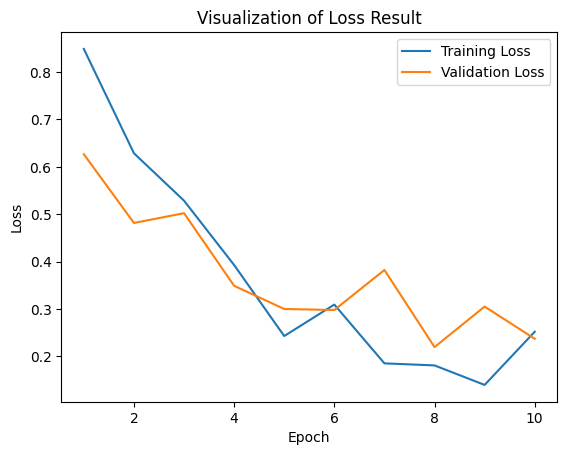

In [81]:
# loss of Train and test

plt.plot(range(1,11),training_history.history['loss'],label='Training Loss')
plt.plot(range(1,11),training_history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()

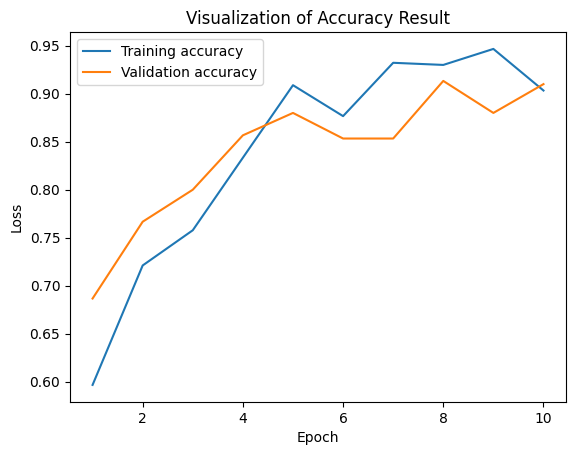

In [82]:
# Accuracy of Train and test

plt.plot(range(1,11),training_history.history['accuracy'],label='Training accuracy')
plt.plot(range(1,11),training_history.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

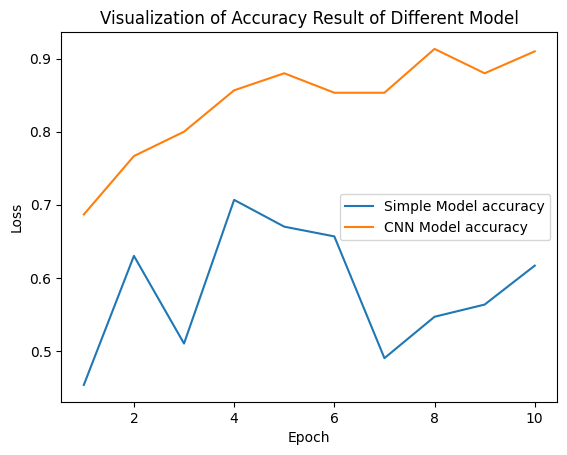

In [123]:
# Different Model Accuracy 

plt.plot(range(1,11),train_history_base_model.history['val_accuracy'],label='Simple Model accuracy')
plt.plot(range(1,11),training_history.history['val_accuracy'],label='CNN Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Visualization of Accuracy Result of Different Model')
plt.legend()
plt.show()